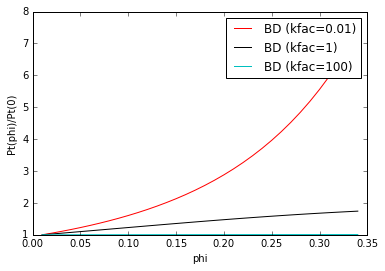

In [96]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
import matplotlib.pyplot as plt

simdata=np.array([[0.01,0.0145,0.0109],[0.03, 0.0368,0.0291],[0.05,0.083695,0.0476],[0.1,0.1589,0.0909],[1,0.6365,0.5],[100,0.997,0.99]])

Pt = lambda x: 1./(1+1./(x))
Cbd = lambda p: ((1-p/2)/(1-p)**3)**2 #enskog theory, Deff/Do=1/g(R)
Cl = lambda p: (1-1.437*p)/(1-p/0.515) #lattice theory D'=Deff, ka'=ka*P_empty
phi = np.arange(0.01,0.35,0.01)
kfacs = [0.01,1,100]
clrs =['r','k','c']
for kf,c in zip(kfacs,clrs):
    Pbd = [Pt(Cbd(p)*kf) for p in phi]
    Pl= [Pt(Cl(p)*kf) for p in phi]
    plt.plot(phi,Pbd/Pbd[0],c=c,label='BD (kfac={})'.format(kf))
    #plt.plot(phi,Pl/Pl[0],'--',c=c,label='lattice (kfac={})'.format(kf))
    plt.xlabel('phi')
    plt.ylabel('Pt(phi)/Pt(0)')
    plt.legend()
    #plt.plot([0.3]*4,[0.01435/0.0099,0.156/0.0909,0.6365/0.5,0.997/0.99],'.')   
    

    


0.000637285604708
0.0313900811151
0.060664087245


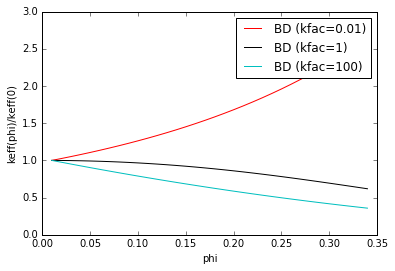

In [109]:
R=0.005
D=1
De=lambda p: (1-p)**3 / (1-p/2)
for kf,c in zip(kfacs,clrs):
    keff = [Pt(Cbd(p)*kf)*4*3.14*R*D*De(p) for p in phi]
    plt.plot(phi,keff/keff[0],c=c,label='BD (kfac={})'.format(kf))
    print(keff[0])
    #plt.plot(phi,Pl/Pl[0],'--',c=c,label='lattice (kfac={})'.format(kf))
    plt.xlabel('phi')
    plt.ylabel('keff(phi)/keff(0)')
    plt.legend()



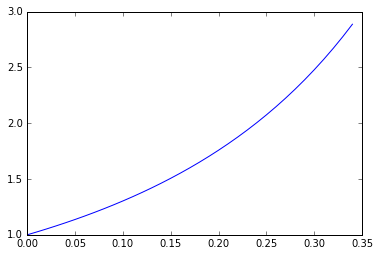

In [115]:
p=np.arange(0,0.35,0.01)
plt.plot(p,1./De(p))

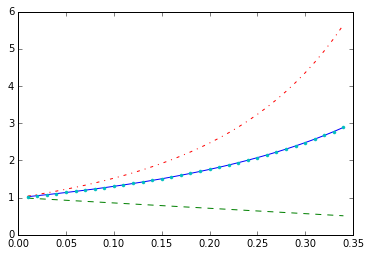

In [3]:
Cbd = lambda p: ((1-p/2)/(1-p)**3) #enskog theory, Deff/Do=1/g(R)
Cl = lambda p: (1-1.437*p) #lattice theory D'=Deff, ka'=ka*P_empty
phi = np.arange(0.01,0.35,0.01)
gbd=[Cbd(p) for p in phi]
gl=[Cl(p) for p in phi]
gdiff=[k/l for k,l in zip(gbd,gl)]
Cf = lambda p: ((1-p/2)/(1-p)**3)/(1-1.437*p)
gc = [Cf(p)*Cl(p) for p in phi]
plt.plot(phi,gbd)
plt.plot(phi,gl,'--')
plt.plot(phi,gdiff,'-.')
plt.plot(phi,gc,'.')

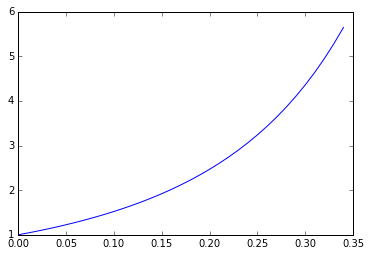

In [4]:
Cf = lambda p: ((1-p/2)/(1-p)**3)/(1-1.437*p)
phi = np.arange(0.0,0.35,0.01)
plt.plot(phi,[Cf(p) for p in phi])

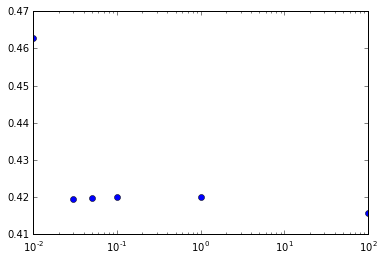

In [93]:
G=[]

for z in simdata:
    kf=z[0]
    pr=z[2]
    gl=0.42/(1./pr -1)/kf
    G.append(gl)
plt.semilogx(simdata[:,0],G,'o')

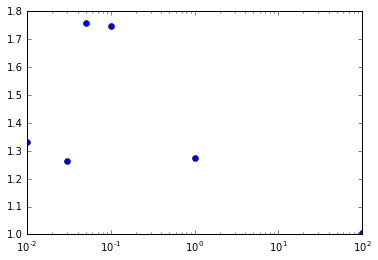

In [94]:
#plt.semilogx([0.01,0.05,0.1,1,100],[0.0145/0.0109,0.083695/0.0476,0.1589/0.0909,0.6365/0.5,0.997/0.99],'o-')
plt.semilogx(simdata[:,0],[x/y for x,y in zip(simdata[:,1],simdata[:,2])],'o')

In [60]:
import os
import pickle
scores = {} # scores is an empty dict already
tmp="/home/chew/notebook/jupyter-notebook/tmp/"
namelist=np.array(os.listdir(tmp))
cnt=0
mean=[]
for n in namelist:
    if n[-6:]=='pickle': 
        target=tmp+n
        sz=os.path.getsize(target)
        if (sz>0):
            cnt+=1
            f=open(target ,"rb")
            unpickler = pickle.Unpickler(f)
            # if file is not empty scores will be equal
            # to the value unpickled
            scores = unpickler.load()
            mean.append(scores)
            #print(scores)    
print(cnt)            
print(mean.count(True)/float(cnt))        




5993
0.014350075087602202


In [ ]:
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()
for n in namelist:
    target=tmp+n
    sz=os.path.getsize(target)
    if (sz>0):
        f=open(target ,"rb")
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()
        #print(scores)

In [126]:
all((True,False))

False

In [120]:
910./1000

0.91